# MANIPULANDO DATA SETE DE POKEMON

Importando df

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# Lê o arquivo CSV chamado 'pokemonGO.csv' localizado na pasta '/content'
# Usa vírgula (',') como separador padrão entre os campos
df = pd.read_csv('/content/pokemonGO.csv', sep=',')

# Renomeia duas colunas do DataFrame:
# - 'Type 1' passa a se chamar 'Type_1'
# - 'Type 2' passa a se chamar 'Type_2'
# Isso é útil para evitar espaços nos nomes de colunas, facilitando consultas com .query(), .loc[], etc.
df.rename(columns={'Type 1': 'Type_1', 'Type 2': 'Type_2'}, inplace=True)

# Substitui todos os espaços nos nomes das colunas do DataFrame por underscores (_)
# Isso padroniza os nomes e evita problemas em comandos como .query() ou ao acessar colunas com df.NOME
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.head()

,Pokemon_No.,Name,Type_1,Type_2,Max_CP,Max_HP,Image_URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


# ***🧪 Exercícios*** **Iniciais**

In [5]:
1 -Quantos pokémons existem no dataset?

Object `dataset` not found.


In [6]:
df.isnull().sum() #verificando se tem valor NULO

,0
Pokemon_No.,0
Name,0
Type_1,0
Type_2,84
Max_CP,0
Max_HP,0
Image_URL,0


In [7]:
df_quntidade_pokemons  = df['Name'].count()


2 - Quais são todos os tipos primários únicos de pokémon?

In [8]:

df_poke_tipos_unicos = df['Type_1'].unique()
df_poke_tipos_unicos


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

3 - Quantos pokémons têm um segundo tipo definido?

In [9]:
# Remove todas as linhas do DataFrame que contenham ao menos um valor NaN (em qualquer coluna)
df_quant_type_2 = df.dropna()
# Atribui apenas a coluna 'Type 2' do DataFrame filtrado anterior à variável df_quant_type_2
# Ou seja, agora df_quant_type_2 deixa de ser um DataFrame e vira uma Series com os valores da coluna 'Type 2'
df_quant_type_2 = df_quant_type_2['Type_2'].count()
df_quant_type_2


np.int64(67)

4 - Qual é o Pokémon com maior CP máximo? E com maior HP máximo?

In [10]:
# Encontra o índice (linha) do Pokémon com o maior valor na coluna 'Max CP'
poke_max_cp = df.loc[df['Max_CP'].idxmax()]
# Encontra o índice (linha) do Pokémon com o maior valor na coluna 'Max HP'
poke_max_hp = df.loc[df['Max_HP'].idxmax()]

5 - Quantos pokémons são do tipo "Fogo" como tipo primário?

In [11]:
# Filtra o DataFrame para retornar apenas as linhas em que o 'Type 1' é igual a 'Fire'
fire_quant = df[df['Type_1'] == 'Fire']

# Conta quantas entradas (não nulas) existem em cada coluna do DataFrame filtrado
fire_quant.count()

,0
Pokemon_No.,12
Name,12
Type_1,12
Type_2,2
Max_CP,12
Max_HP,12
Image_URL,12



6 - Filtre os pokémons que têm o tipo "Água" como segundo tipo.


In [12]:
# Filtra os dados e guarda apenas os Pokémons que têm 'Water' (água) como segundo tipo
df_poke_agua = df[df['Type_2'] == 'Water']
df_poke_agua

,Pokemon_No.,Name,Type_1,Type_2,Max_CP,Max_HP,Image_URL
137,138,Omanyte,Rock,Water,1127,67,http://cdn.bulbagarden.net/upload/thumb/7/79/1...
138,139,Omastar,Rock,Water,2249,122,http://cdn.bulbagarden.net/upload/thumb/4/43/1...
139,140,Kabuto,Rock,Water,1112,59,http://cdn.bulbagarden.net/upload/thumb/f/f9/1...
140,141,Kabutops,Rock,Water,2145,107,http://cdn.bulbagarden.net/upload/thumb/2/29/1...


7 - Qual é a média do CP máximo de todos os pokémons?

In [13]:
# Calcula a média (valor médio) do CP máximo de todos os Pokémons
df_media_cp_max = df['Max_CP'].mean()
df_media_cp_max

np.float64(1637.291390728477)

# ***🔁 Exercícios Intermediários***

1 -Crie uma nova coluna chamada "Total de Poder" somando CP máximo e HP máximo.

In [14]:
df['Total_do_poder'] = df['Max_CP'] + df['Max_HP']
df

,Pokemon_No.,Name,Type_1,Type_2,Max_CP,Max_HP,Image_URL,Total_do_poder
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,1162
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,1750
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...,2736
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...,1035
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...,1671
...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,990,76,http://cdn.bulbagarden.net/upload/thumb/c/cc/1...,1066
147,148,Dragonair,Dragon,NaN,1760,108,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,1868
148,149,Dragonite,Dragon,Flying,3525,156,http://cdn.bulbagarden.net/upload/thumb/8/8b/1...,3681
149,150,Mewtwo,Psychic,NaN,4174,180,http://cdn.bulbagarden.net/upload/thumb/7/78/1...,4354


2 -Liste os 10 pokémons com o maior "Total de Poder".

In [15]:
# Obtém os índices (ou rótulos das linhas) dos 10 maiores valores na coluna "Total do poder"
df_index = df['Total_do_poder'].nlargest(10).index

# Usa esses índices para selecionar e exibir as 10 linhas correspondentes no DataFrame original
df.loc[df_index]

,Pokemon_No.,Name,Type_1,Type_2,Max_CP,Max_HP,Image_URL,Total_do_poder
149,150,Mewtwo,Psychic,NaN,4174,180,http://cdn.bulbagarden.net/upload/thumb/7/78/1...,4354
148,149,Dragonite,Dragon,Flying,3525,156,http://cdn.bulbagarden.net/upload/thumb/8/8b/1...,3681
150,151,Mew,Psychic,NaN,3322,170,http://cdn.bulbagarden.net/upload/thumb/b/b1/1...,3492
145,146,Moltres,Fire,Flying,3263,154,http://cdn.bulbagarden.net/upload/thumb/1/1b/1...,3417
142,143,Snorlax,Normal,NaN,3135,265,http://cdn.bulbagarden.net/upload/thumb/f/fb/1...,3400
144,145,Zapdos,Electric,Flying,3136,154,http://cdn.bulbagarden.net/upload/thumb/e/e3/1...,3290
130,131,Lapras,Water,Ice,3002,218,http://cdn.bulbagarden.net/upload/thumb/a/ab/1...,3220
58,59,Arcanine,Fire,NaN,3005,154,http://cdn.bulbagarden.net/upload/thumb/b/b8/0...,3159
143,144,Articuno,Ice,Flying,2999,154,http://cdn.bulbagarden.net/upload/thumb/4/4e/1...,3153
102,103,Exeggutor,Grass,Psychic,2976,162,http://cdn.bulbagarden.net/upload/thumb/2/24/1...,3138


3 -Quantos pokémons têm os dois tipos iguais (primário e secundário)?

In [16]:
# Filtra o DataFrame para mostrar apenas os Pokémon cujo tipo primário (Type_1)
# é igual ao tipo secundário (Type_2)
df.query('Type_1 == Type_2')


,Pokemon_No.,Name,Type_1,Type_2,Max_CP,Max_HP,Image_URL,Total_do_poder


4 -Quantos pokémons têm "Venenoso" em qualquer um dos tipos?

In [17]:
df.query('Type_1 == "Poison" or Type_2 == "Poison"').count()

,0
Pokemon_No.,33
Name,33
Type_1,33
Type_2,23
Max_CP,33
Max_HP,33
Image_URL,33
Total_do_poder,33


5 -Qual o tipo primário mais comum no dataset?

In [18]:
# Calcula a moda da coluna 'Type_1' do DataFrame df,
# ou seja, retorna o(s) tipo(s) primário(s) de Pokémon que aparecem com mais frequência no conjunto de dados
df['Type_1'].mode()

,Type_1
0,Water


6 -Crie uma tabela que mostre a média de CP máximo para cada tipo primário.

In [19]:
df_poke_tipos_unicos = df['Type_1'].unique()
df_poke_tipos_unicos

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

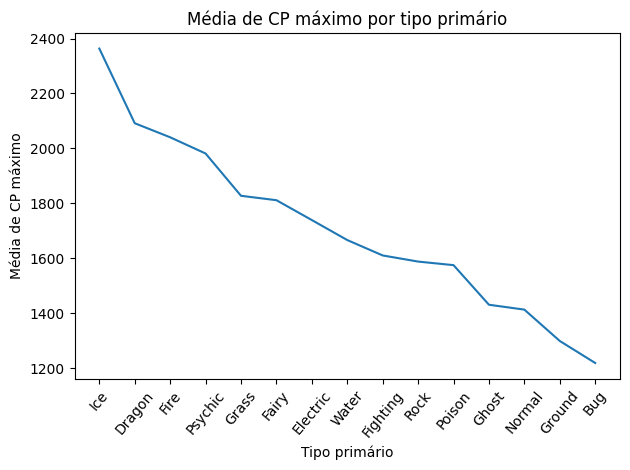

In [39]:
# Agrupa os dados do DataFrame original (df) pelo tipo primário (Type_1)
# Em seguida, calcula a média da coluna 'Max_CP' para cada tipo
# Ordena do maior para o menor (descending)
# Arredonda os valores para 2 casas decimais
df_media_cp_type = df.groupby('Type_1')['Max_CP'].mean().sort_values(ascending=False).round(2)

# Plota um gráfico de linha com os valores calculados
# Como o df_media_cp_type é uma Series, o eixo X será o índice (os tipos primários)
# e o eixo Y será a média do CP máximo
plt.plot(df_media_cp_type)

# Define o título do gráfico
plt.title('Média de CP máximo por tipo primário')

# Define o texto do eixo X
plt.xlabel('Tipo primário')

# Define o texto do eixo Y
plt.ylabel('Média de CP máximo')

# Rotaciona os rótulos do eixo X em 50 graus
# Isso ajuda a evitar que os nomes dos tipos se sobreponham
plt.xticks(rotation=50)

# Ajusta automaticamente o layout para que nada fique cortado
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()

# ***📊 Exercícios Avançados***

1 -Crie um gráfico de barras com os 5 tipos primários mais frequentes.

2 -Agrupe os pokémons por tipo primário e conte quantos têm um segundo tipo.

3 -Encontre todos os pokémons cujo nome começa com a letra "B".

4 -Crie uma função que receba um nome e retorne o CP e HP do pokémon.

5 -Baixe as imagens de todos os pokémons usando a coluna URL.

6 -Classifique os pokémons em três categorias: fraco (CP < 1000), médio (1000 ≤ CP < 2000) e forte (CP ≥ 2000).